**`Importando las librerias`**

In [58]:
import pandas as pd
import numpy as np
import ast
import math

import matplotlib.pyplot as plt
import seaborn as sns

- - -

# <h2 align=center> **ETL - Extraction, Transformation and Loading** </h1>

1.- **`Se importan los datos desde el dataset: movies_dataset.csv`**.

In [25]:
ruta_archivo = "./Datasets/movies_dataset.csv"
df_movies = pd.read_csv(ruta_archivo)

/run/media/ramirezla/eHome160Gb/Cursos/HenryData-PT02/COHORTE01/Proyectos/PI_ML_OPS-main_fastapi/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
# Se muestra la cabecera para observar parte de los datos y las columnas

df_movies.head().T

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [27]:
# Se verifica la cantidad de columnas y filas

df_movies.shape

(45466, 24)

In [28]:
# Se muestra la informacion de los datos que se tienen, buscando los datos que son y/o deberian ser numéricos
# y los categóricos.
# Tambien se pueden ver de la cantidad de datos, si se tienen datos nulos o vacios.

# Los datos numéricos son datos de tipo: float65, int64
# Los datos categóricos son datos de tipo: object

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

**`Trabajando con los Datos Numéricos`**.

- budget
- revenue
- runtime
- vote_average
- vote_count

In [29]:
# Se cambian cualquier valor que no sea numerico de la columna 'budget' por NaN
df_movies['budget'] = pd.to_numeric(df_movies['budget'], errors='coerce')

# se cambian los valores NaN por 0 (cero)
df_movies['budget'] = df_movies['budget'].fillna(0)

# Se cambia el tipo de datos a float64
df_movies['budget'] = df_movies['budget'].astype('float64')

# se cambian los valores NaN por 0 (cero)
df_movies['revenue'] = df_movies['revenue'].fillna(0)

# se cambian los valores NaN por 0 (cero)
df_movies['runtime'] = df_movies['runtime'].fillna(0)

# se cambian los valores NaN por 0 (cero)
df_movies['vote_average'] = df_movies['vote_average'].fillna(0)

# se cambian los valores NaN por 0 (cero)
df_movies['vote_count'] = df_movies['vote_count'].fillna(0)

In [30]:
# Se muestra la descripcion de los datos numericos
df_movies.describe()

,budget,revenue,runtime,vote_average,vote_count
count,4.546600e+04,4.546600e+04,45466.000000,45466.000000,45466.000000
mean,4.224300e+06,1.120787e+07,93.583711,5.617466,109.882836
std,1.742359e+07,6.432813e+07,38.956167,1.925171,491.279576
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000


**`Trabajando con los Datos Categóricos`**.

In [31]:
# Se separan en 2 dataframe nuevos, las variables categoricas.

df_categoricas = df_movies.select_dtypes(include=['object', 'category'])
df_numericas = df_movies.select_dtypes(include='number')

df_categoricas.head(2).T

,0,1
adult,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
homepage,http://toystory.disney.com/toy-story,NaN
id,862,8844
imdb_id,tt0114709,tt0113497
original_language,en,en
original_title,Toy Story,Jumanji
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...
popularity,21.9469,17.0155


In [32]:
# Conteo de los niveles en las diferentes columnas categoricas para las que se tienen idea, por ejemplo: si es sexo deberia tener 2 categorias hombre o mujer (por ahora).
# si es estado civil puede haber soltero, casado, divorciado, otros, etc.
# Con esto podemos determinar si alguna tiene una sola cetegoria, entonces, esta columna no aportara nada.

# Si se desea en algunos datos categoricos que si tenemos idea de cuantas categorias deberia traer.
# columnas = ['adult', 'genres', 'original_language', 'spoken_languages', 'status', 'video']

for col in df_categoricas:
    print(f'Columna {col}: {len(df_categoricas[col].unique())} subniveles')

Columna adult: 5 subniveles
Columna belongs_to_collection: 1699 subniveles
Columna genres: 4069 subniveles
Columna homepage: 7674 subniveles
Columna id: 45436 subniveles
Columna imdb_id: 45418 subniveles
Columna original_language: 93 subniveles
Columna original_title: 43373 subniveles


Columna overview: 44308 subniveles
Columna popularity: 44177 subniveles
Columna poster_path: 45025 subniveles
Columna production_companies: 22709 subniveles
Columna production_countries: 2394 subniveles
Columna release_date: 17337 subniveles
Columna spoken_languages: 1932 subniveles
Columna status: 7 subniveles
Columna tagline: 20284 subniveles
Columna title: 42278 subniveles
Columna video: 3 subniveles


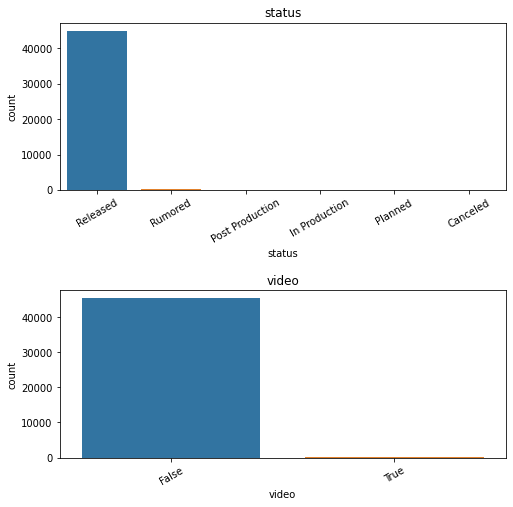

In [36]:
# Graficando algunos campos y sus categorias

# columnas = ['adult', 'status', 'video']
columnas = ['status', 'video']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
fig.subplots_adjust(hspace=0.6)

for i, col in enumerate(columnas):
    sns.countplot(x=col, data=df_categoricas, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [41]:
print(df_categoricas['video'].unique())

[False True nan]


Para trabajar con las columnas anidadas, columnas tipo listas y columnas tipos diccionarios de listas, se crearan unas funciones, donde se colocara la columna que yo quiero desanidar y cual valor me interas obtener.

In [43]:
# Trabajando con diccionarios
# El valor a extraer es 'name'

def Valor_name_desde_dicc(value):
    try:                                        # Captura el error que se puede producir si se pasa un tipo de datos diferente a un diccionario
        diccionario = ast.literal_eval(value)   # Se guarda el valor al ejecutar la libreria, nos permitira verificar si es un diccionario
        if isinstance(diccionario, dict):       # Se evalua si es diccionario
            return diccionario.get('name', '')  # Regresa el valor de la clave 'name'
    except (ValueError, SyntaxError):           # Si captura algun error
        pass                                    # No se muestra error
    return ''                                   # Si no es posible evaluarlo como un diccionario, devolvemos una cadena vacía

In [44]:
# Trabajando con diccionario de listas
# El valor a extraer es 'name'

def Valor_name_desde_list(value):
    try:                                        # Captura el error que se puede producir si se pasa un tipo de datos diferente a un diccionario
        lista_dicc = ast.literal_eval(value)    # Se guarda el valor al ejecutar la libreria, nos permitira verificar si es una lista de diccionario
        if isinstance(lista_dicc, list):        # Se evalua si es lista
            name = [dic.get('name','') for dic in lista_dicc if isinstance(dic, dict)]  # Regresa los valores de la clave 'name', pueden ser varios ya que es una lista de diccionarios
            return ','.join(name)               # Encadena cada uno de los valores 'name'
    except (ValueError, SyntaxError):           # Si captura algun error
        pass                                    # No se muestra error
    return ''                                   # Si no es posible evaluarlo como un diccionario, devolvemos una cadena vacía

In [45]:
# Trabajando con diccionario de listas
# El valor a extraer es 'character'

def Valor_character_desde_list(value):
    try:                                        # Captura el error que se puede producir si se pasa un tipo de datos diferente a un diccionario
        lista_dicc = ast.literal_eval(value)    # Se guarda el valor al ejecutar la libreria, nos permitira verificar si es una lista de diccionario
        if isinstance(lista_dicc, list):        # Se evalua si es lista
            character = [dic.get('character','') for dic in lista_dicc if isinstance(dic, dict)]  # Regresa los valores de la clave 'name', pueden ser varios ya que es una lista de diccionarios
            return ','.join(character)               # Encadena cada uno de los valores 'name'
    except (ValueError, SyntaxError):           # Si captura algun error
        pass                                    # No se muestra error
    return ''                                   # Si no es posible evaluarlo como un diccionario, devolvemos una cadena vacía

In [46]:
# Trabajando con diccionario de listas
# El valor a extraer es 'department'

def Valor_department_desde_list(value):
    try:                                        # Captura el error que se puede producir si se pasa un tipo de datos diferente a un diccionario
        lista_dicc = ast.literal_eval(value)    # Se guarda el valor al ejecutar la libreria, nos permitira verificar si es una lista de diccionario
        if isinstance(lista_dicc, list):        # Se evalua si es lista
            department = [dic.get('department','') for dic in lista_dicc if isinstance(dic, dict)]  # Regresa los valores de la clave 'name', pueden ser varios ya que es una lista de diccionarios
            return ','.join(department)               # Encadena cada uno de los valores 'name'
    except (ValueError, SyntaxError):           # Si captura algun error
        pass                                    # No se muestra error
    return ''                                   # Si no es posible evaluarlo como un diccionario, devolvemos una cadena vacía

In [47]:
# Trabajando con diccionario de listas
# El valor a extraer es 'job'

def Valor_job_desde_list(value):
    try:                                        # Captura el error que se puede producir si se pasa un tipo de datos diferente a un diccionario
        lista_dicc = ast.literal_eval(value)    # Se guarda el valor al ejecutar la libreria, nos permitira verificar si es una lista de diccionario
        if isinstance(lista_dicc, list):        # Se evalua si es lista
            job = [dic.get('job','') for dic in lista_dicc if isinstance(dic, dict)]  # Regresa los valores de la clave 'name', pueden ser varios ya que es una lista de diccionarios
            return ','.join(job)               # Encadena cada uno de los valores 'name'
    except (ValueError, SyntaxError):           # Si captura algun error
        pass                                    # No se muestra error
    return ''                                   # Si no es posible evaluarlo como un diccionario, devolvemos una cadena vacía

In [48]:
# Realizando una copia del dataframe inicial para no modificar el dataframe original

df_movies_desanidado = df_movies.copy()

In [49]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a la misma columna en el dataframe.
df_movies_desanidado['d_belongs_to_collection'] = df_movies_desanidado['belongs_to_collection'].apply(Valor_name_desde_dicc)

# Mostrar el DataFrame resultante
df_movies_desanidado.drop(columns=['belongs_to_collection'], inplace=True)
df_movies_desanidado = df_movies_desanidado.rename(index=str, columns= {"d_belongs_to_collection": "belongs_to_collection"})

# Se le quita la palabra " Collection" que los valores 'belongs_to_collection' tienen en su valor
df_movies_desanidado['belongs_to_collection'] = df_movies_desanidado['belongs_to_collection'].str.replace(" Collection", "", regex=False)

# Se muestra informacion del dataframe
# df_movies_desanidado['belongs_to_collection'].head().T

In [50]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a una nueva columna en el dataframe.
df_movies_desanidado['d_genres'] = df_movies_desanidado['genres'].apply(Valor_name_desde_list)

# Mostrar el DataFrame resultante
df_movies_desanidado.drop(columns=['genres'], inplace=True)
df_movies_desanidado = df_movies_desanidado.rename(index=str, columns= {"d_genres": "genres"})
# df_movies_desanidado['genres'].head().T

In [51]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a una nueva columna en el dataframe.
df_movies_desanidado['d_production_companies'] = df_movies_desanidado['production_companies'].apply(Valor_name_desde_list)

# Mostrar el DataFrame resultante
df_movies_desanidado.drop(columns=['production_companies'], inplace=True)
df_movies_desanidado = df_movies_desanidado.rename(index=str, columns= {"d_production_companies": "production_companies"})
# df_movies_desanidado['production_companies'].head().T

In [52]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a una nueva columna en el dataframe.
df_movies_desanidado['d_production_countries'] = df_movies_desanidado['production_countries'].apply(Valor_name_desde_list)

# Mostrar el DataFrame resultante
df_movies_desanidado.drop(columns=['production_countries'], inplace=True)
df_movies_desanidado = df_movies_desanidado.rename(index=str, columns= {"d_production_countries": "production_countries"})
# df_movies_desanidado['production_countries'].head().T

In [53]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a una nueva columna en el dataframe.
df_movies_desanidado['d_spoken_languages'] = df_movies_desanidado['spoken_languages'].apply(Valor_name_desde_list)

# Mostrar el DataFrame resultante
df_movies_desanidado.drop(columns=['spoken_languages'], inplace=True)
df_movies_desanidado = df_movies_desanidado.rename(index=str, columns= {"d_spoken_languages": "spoken_languages"})
# df_movies_desanidado['spoken_languages'].head().T

**`Trabajando con los datos de tipo fechas`**.

In [54]:
# valores nulos del campo 'release_date' deben eliminarse
# Eliminando filas con datos faltantes en los campos 'release_date'

# Se muestra la cantidad de valores nulos en el campo 'release_date'
print('Cantidad de valores nulos antes de eliminar: ', df_movies_desanidado['release_date'].isnull().sum())

# Se quitan las filas que tienen valores nulos en el campo 'release_date'
df_movies_desanidado.dropna(subset=['release_date'], inplace=True)

# Se muestra la cantidad de valores nulos en el campo 'release_date'
print('Cantidad de valores nulos despues de eliminar: ', df_movies_desanidado['release_date'].isnull().sum())

Cantidad de valores nulos antes de eliminar:  87
Cantidad de valores nulos despues de eliminar:  0


In [55]:
# Se convierte la columna de tipo fecha 'release_date' en un formato de fecha 'AAAA-mm-dd'

df_movies_desanidado['release_date'] = pd.to_datetime(df_movies_desanidado['release_date'], errors='coerce').dt.strftime('%Y-%m-%d')

# Se muestra la cantidad de valores nulos en el campo 'release_date' antes de formatear la fecha
print('Cantidad de valores nulos despues de formatear la fecha: ',df_movies_desanidado['release_date'].isnull().sum())

# Se quitan las filas que tienen valores nulos en el campo 'release_date' despues de formatear la fecha
df_movies_desanidado.dropna(subset=['release_date'], inplace=True)

# Se muestra la cantidad de valores nulos en el campo 'release_date' despues de formatear la fecha
print('Cantidad de valores nulos despues de eliminar: ', df_movies_desanidado['release_date'].isnull().sum())

Cantidad de valores nulos despues de formatear la fecha:  3
Cantidad de valores nulos despues de eliminar:  0


In [56]:
# Se extrae el año del campo fecha 'release_date' creando un nuevo campo 'release_year' con el dato de año
df_movies_desanidado['release_year'] = pd.to_datetime(df_movies_desanidado['release_date'], errors='coerce').dt.year

# Se cambia el tipo de dato float64 del campo nuevo 'release_year' a un tipo de dato 'int64' para que no venga con decimal
df_movies_desanidado['release_year'] = df_movies_desanidado['release_year'].astype('int64')
df_movies_desanidado['release_year'].head(5)

0    1995
1    1995
2    1995
3    1995
4    1995
Name: release_year, dtype: int64

**`Trabajando con calculo de inversion`**.

In [57]:
# Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, 
# dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0
# Es importante saber si el divisor 'revenue' tiene valores 0, ya que no existe la division por 0
# Se crea una fumcion lambda, donde retorna 0 si budget es 0, de lo contrario, retorna la division de revenue / budget y crea la columna 'return'

df_movies_desanidado['return'] = df_movies_desanidado.apply(lambda x_return: 0 if x_return['budget'] == 0 else (x_return['revenue'] / x_return['budget']), axis=1)

# Mostrando las columnas para la division y la columna resultado
df_movies_desanidado[['revenue','budget','return']].head()

,revenue,budget,return
0,373554033.0,30000000.0,12.451801
1,262797249.0,65000000.0,4.043035
2,0.0,0.0,0.000000
3,81452156.0,16000000.0,5.090760
4,76578911.0,0.0,0.000000


**`Eliminando columnas`**.

In [58]:
# Eliminando las columnas: video, imdb_id, adult, original_title, poster_path y homepage

df_movies_desanidado.drop(columns=['video', 'imdb_id','adult', 'original_title', 'poster_path', 'homepage'], inplace=True)

In [59]:
# Haciendo una copia del dataframe trabajado, reordenando las columnas.
# Tratamiento y Recolección de los datos (Data Engineer stuff) ETL

df_movies_ETL = pd.DataFrame(df_movies_desanidado, 
                             columns=['id', 'title', 'genres', 'overview', 'budget', 
                                      'spoken_languages', 'original_language', 'belongs_to_collection', 'production_companies', 'production_countries', 
                                      'status', 'release_date', 'release_year', 'runtime', 'popularity', 
                                      'vote_count', 'vote_average', 'revenue', 'return', 'tagline'])

In [60]:
# La columna 'tagline' es elegible a ser borrada

print('Total de datos del campo tagline: ', len(df_movies_ETL['tagline']))
print('Cantidad de valores nulos del campo tagline: ', df_movies_ETL['tagline'].isnull().sum())
print('Porcentaje de datos nulos: ', round(df_movies_ETL['tagline'].isnull().sum() / (len(df_movies_ETL['tagline'])) * 100, 2),'%')

Total de datos del campo tagline:  45376
Cantidad de valores nulos del campo tagline:  24978
Porcentaje de datos nulos:  55.05 %


In [33]:
# Se hace un respaldo en disco de una archivo csv

ruta_archivo = "./Datasets/LARG_movies_dataset_ETL.csv"
df_movies_ETL.to_csv(ruta_archivo, sep=',')

1.- **`Se importan los datos desde el dataset: credits.csv`**.

In [61]:
ruta_archivo_credits = "./Datasets/credits.csv"
df_credits = pd.read_csv(ruta_archivo_credits)

**`Trabajando con los Datos Numéricos`**.

In [62]:
# se cambian los valores NaN por 0 (cero)

df_credits['id'] = df_credits['id'].fillna(0)

**`Trabajando con los Datos Categóricos`**.

In [63]:
# Realizando una copia del dataframe inicial para no modificar el dataframe original

df_credits_desanidado = df_credits.copy()

In [64]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a la misma columna en el dataframe.
df_credits_desanidado['d_character'] = df_credits_desanidado['cast'].apply(Valor_character_desde_list)
df_credits_desanidado['d_name'] = df_credits_desanidado['cast'].apply(Valor_name_desde_list)

# df_credits_desanidado.head()
# Mostrar el DataFrame resultante
df_credits_desanidado.drop(columns=['cast'], inplace=True)
df_credits_desanidado = df_credits_desanidado.rename(index=str, columns= {"d_character": "character"})
df_credits_desanidado = df_credits_desanidado.rename(index=str, columns= {"d_name": "cast"})
# df_credits_desanidado.head().T

In [65]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a la misma columna en el dataframe.
df_credits_desanidado['d_department'] = df_credits_desanidado['crew'].apply(Valor_department_desde_list)
df_credits_desanidado['d_job'] = df_credits_desanidado['crew'].apply(Valor_job_desde_list)
df_credits_desanidado['d_name'] = df_credits_desanidado['crew'].apply(Valor_name_desde_list)

# df_credits_desanidado.head()
# Mostrar el DataFrame resultante
df_credits_desanidado.drop(columns=['crew'], inplace=True)
df_credits_desanidado = df_credits_desanidado.rename(index=str, columns= {"d_department": "department"})
df_credits_desanidado = df_credits_desanidado.rename(index=str, columns= {"d_job": "job"})
df_credits_desanidado = df_credits_desanidado.rename(index=str, columns= {"d_name": "crew"})
# df_credits_desanidado.head().T

In [39]:
# Se hace un respaldo en disco de un archivo csv
ruta_archivo_credits_csv = "./Datasets/LARG_creditsdataset_reducido.csv"
df_credits_desanidado.to_csv(ruta_archivo_credits_csv, sep=',')

Con los datasets de movies y credits limpios se procede a realizar un merge entre ambos por la columna que identifica la pelicula (id)

In [66]:
# Cargamos los 2 datasets

ruta_archivo_movies = "./Datasets/LARG_movies_dataset_ETL.csv"
df_movies_des = pd.read_csv(ruta_archivo_movies)

ruta_archivo_credits = "./Datasets/LARG_creditsdataset_reducido.csv"
df_credits_des = pd.read_csv(ruta_archivo_credits)

In [67]:
# Se eliminan columnas que no son necesarias
# print(df_movies_des.columns)
# print(df_credits_des.columns)
df_movies_des.drop(["Unnamed: 0"], axis=1, inplace=True)
df_credits_des.drop(["Unnamed: 0"], axis=1, inplace=True)
print(df_movies_des.columns)
print(df_credits_des.columns)

Index(['id', 'title', 'genres', 'overview', 'budget', 'spoken_languages',
       'original_language', 'belongs_to_collection', 'production_companies',
       'production_countries', 'status', 'release_date', 'release_year',
       'runtime', 'popularity', 'vote_count', 'vote_average', 'revenue',
       'return', 'tagline'],
      dtype='object')
Index(['id', 'character', 'cast', 'department', 'job', 'crew'], dtype='object')


In [68]:
# Se hace un merge de los dos datasets, unidos por la columna id
df_movies_credits_merge_by_id = pd.merge(df_movies_des, df_credits_des, on='id')
# Se quitan las filas duplicadas y se crea un datasets con las columnas consideradas importantes para el ML
df_movies_credits_merge_by_id.drop_duplicates(inplace=True)

In [69]:
print('Cantidad de nulos: ', df_movies_credits_merge_by_id.isnull().sum())

Cantidad de nulos:  id                           0
title                        0
genres                    2383
overview                   941
budget                       0
spoken_languages          3888
original_language           11
belongs_to_collection    40881
production_companies     11792
production_countries      6208
status                      80
release_date                 0
release_year                 0
runtime                      0
popularity                   0
vote_count                   0
vote_average                 0
revenue                      0
return                       0
tagline                  24973
character                 2499
cast                      2348
department                 723
job                        723
crew                       723
dtype: int64


A los datos categoricos que traen NaN, se toma la decisión de colocar ' ' para evitar problemas a futuro.

In [70]:
df_movies_credits_merge_by_id.fillna(' ', inplace=True)

In [71]:
print('Cantidad de nulos: ', df_movies_credits_merge_by_id.isnull().sum())

Cantidad de nulos:  id                       0
title                    0
genres                   0
overview                 0
budget                   0
spoken_languages         0
original_language        0
belongs_to_collection    0
production_companies     0
production_countries     0
status                   0
release_date             0
release_year             0
runtime                  0
popularity               0
vote_count               0
vote_average             0
revenue                  0
return                   0
tagline                  0
character                0
cast                     0
department               0
job                      0
crew                     0
dtype: int64


In [72]:
df_movies_credits_merge_by_id.head().T

,0,1,2,3,4
id,862,8844,15602,31357,11862
title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
genres,"Animation,Comedy,Family","Adventure,Fantasy,Family","Romance,Comedy","Comedy,Drama,Romance",Comedy
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
budget,3e+07,6.5e+07,0,1.6e+07,0
spoken_languages,English,"English,Français",English,English,English
original_language,en,en,en,en,en
belongs_to_collection,Toy Story,,Grumpy Old Men,,Father of the Bride
production_companies,Pixar Animation Studios,"TriStar Pictures,Teitler Film,Interscope Commu...","Warner Bros.,Lancaster Gate",Twentieth Century Fox Film Corporation,"Sandollar Productions,Touchstone Pictures"
production_countries,United States of America,United States of America,United States of America,United States of America,United States of America


In [123]:
# Se hace un respaldo en disco de un archivo csv
ruta_archivo_credits_csv = "./Datasets/LARG_moviesdtaset_full.csv"
df_movies_credits_merge_by_id.to_csv(ruta_archivo_credits_csv, sep=',')

- - -

# <h2 align=center> **EDA - Exploratory Data Analysis** </h1>

In [73]:
# Se importa el archivo 'LARG_moviesdtaset_full.csv' con todos los datos de las peliculas, aprox. 45.369 registros
# El archivo ya contiene la data limpia del ETL.
ruta_archivo_movies = "./Datasets/LARG_moviesdtaset_full.csv"
df_movies_credits_merge_by_id = pd.read_csv(ruta_archivo_movies)

In [74]:
df_movies_credits_merge_by_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45369 entries, 0 to 45368
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             45369 non-null  int64  
 1   id                     45369 non-null  int64  
 2   title                  45369 non-null  object 
 3   genres                 45369 non-null  object 
 4   overview               45369 non-null  object 
 5   budget                 45369 non-null  float64
 6   spoken_languages       45369 non-null  object 
 7   original_language      45369 non-null  object 
 8   belongs_to_collection  45369 non-null  object 
 9   production_companies   45369 non-null  object 
 10  production_countries   45369 non-null  object 
 11  status                 45369 non-null  object 
 12  release_date           45369 non-null  object 
 13  release_year           45369 non-null  int64  
 14  runtime                45369 non-null  float64
 15  po

In [75]:
print('Cantidad de nulos: ', df_movies_credits_merge_by_id.isnull().sum())
print(f'Tamaño antes de eliminar las filas con datos nulos: {df_movies_credits_merge_by_id.shape}')

Cantidad de nulos:  Unnamed: 0               0
id                       0
title                    0
genres                   0
overview                 0
budget                   0
spoken_languages         0
original_language        0
belongs_to_collection    0
production_companies     0
production_countries     0
status                   0
release_date             0
release_year             0
runtime                  0
popularity               0
vote_count               0
vote_average             0
revenue                  0
return                   0
tagline                  0
character                0
cast                     0
department               0
job                      0
crew                     0
dtype: int64
Tamaño antes de eliminar las filas con datos nulos: (45369, 26)


In [76]:
# Eliminando columna Unnamed: 0, de ambos datasets
df_movies_credits_merge_by_id.drop('Unnamed: 0', axis=1, inplace=True)

In [77]:
df_movies_credits_merge_by_id.describe()

,id,budget,release_year,runtime,popularity,vote_count,vote_average,revenue,return
count,45369.000000,4.536900e+04,45369.000000,45369.000000,45369.000000,45369.000000,45369.000000,4.536900e+04,4.536900e+04
mean,108019.806321,4.235176e+06,1991.880249,93.674293,2.926367,110.111684,5.623963,1.123325e+07,6.601447e+02
std,112163.280250,1.744194e+07,24.054864,38.859460,6.009963,491.779996,1.915495,6.439490e+07,7.469906e+04
min,2.000000,0.000000e+00,1874.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,26387.000000,0.000000e+00,1978.000000,85.000000,0.388844,3.000000,5.000000,0.000000e+00,0.000000e+00
50%,59858.000000,0.000000e+00,2001.000000,95.000000,1.130300,10.000000,6.000000,0.000000e+00,0.000000e+00
75%,156415.000000,0.000000e+00,2010.000000,107.000000,3.691443,34.000000,6.800000,0.000000e+00,0.000000e+00
max,469172.000000,3.800000e+08,2020.000000,1256.000000,547.488298,14075.000000,10.000000,2.787965e+09,1.239638e+07


In [78]:
df_movies_credits_merge_by_id.drop_duplicates(inplace=True)

2.- **`Detectando outlies o valores extremos`**

In [79]:
# Conteo de los niveles en las diferentes columnas categoricas para las que se tienen idea, por ejemplo: si es sexo deberia tener 2 categorias hombre o mujer (por ahora).
# si es estado civil puede haber soltero, casado, divorciado, otros, etc.
# Con esto podemos determinar si alguna tiene una sola cetegoria, entonces, esta columna no aportara nada.

# Si se desea en algunos datos categoricos que si tenemos idea de cuantas categorias deberia traer.
# columnas = ['adult', 'genres', 'original_language', 'spoken_languages', 'status', 'video']

for col in df_movies_credits_merge_by_id:
    print(f'Columna {col}: {len(df_movies_credits_merge_by_id[col].unique())} subniveles')

Columna id: 45345 subniveles
Columna title: 42195 subniveles
Columna genres: 4065 subniveles
Columna overview: 44231 subniveles
Columna budget: 1223 subniveles
Columna spoken_languages: 1842 subniveles
Columna original_language: 90 subniveles
Columna belongs_to_collection: 1694 subniveles
Columna production_companies: 22668 subniveles
Columna production_countries: 2389 subniveles
Columna status: 7 subniveles
Columna release_date: 17333 subniveles
Columna release_year: 135 subniveles
Columna runtime: 353 subniveles
Columna popularity: 43803 subniveles
Columna vote_count: 1820 subniveles
Columna vote_average: 92 subniveles
Columna revenue: 6863 subniveles
Columna return: 5232 subniveles
Columna tagline: 20270 subniveles


Columna character: 40166 subniveles
Columna cast: 42657 subniveles
Columna department: 23596 subniveles
Columna job: 26591 subniveles
Columna crew: 42909 subniveles


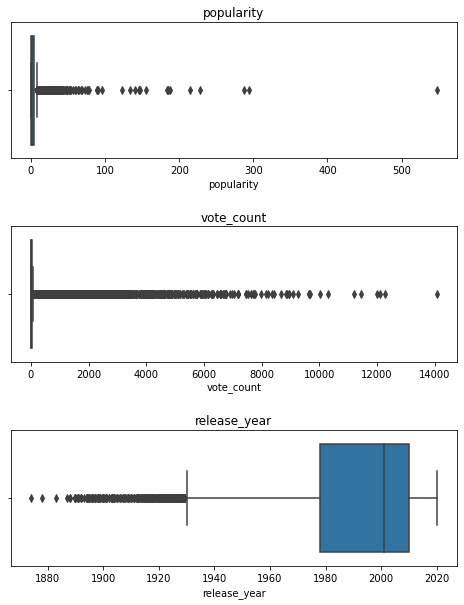

In [80]:
# Verificar si hay outlies o valores extremos, se debe decidir si se eliminan o se mantienen, 
# eso depende de lo que deseamos.
columnas_numericas = ['popularity', 'vote_count', 'release_year']
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=col, data=df_movies_credits_merge_by_id, ax=ax[i])
    ax[i].set_title(col)

In [81]:
# Matriz de correlacion

# columnas_utilizar = ['belongs_to_collection', 'popularity', 'vote_average', 'budget', 'revenue']
columnas_numericas = ['popularity', 'vote_average', 'revenue', 'budget']
# Matriz de correlación
correlation_matrix = df_movies_credits_merge_by_id[columnas_numericas].corr()
print(correlation_matrix)

              popularity  vote_average   revenue    budget
popularity      1.000000      0.153758  0.506199  0.449633
vote_average    0.153758      1.000000  0.083824  0.073215
revenue         0.506199      0.083824  1.000000  0.768737
budget          0.449633      0.073215  0.768737  1.000000


array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>]], dtype=object)

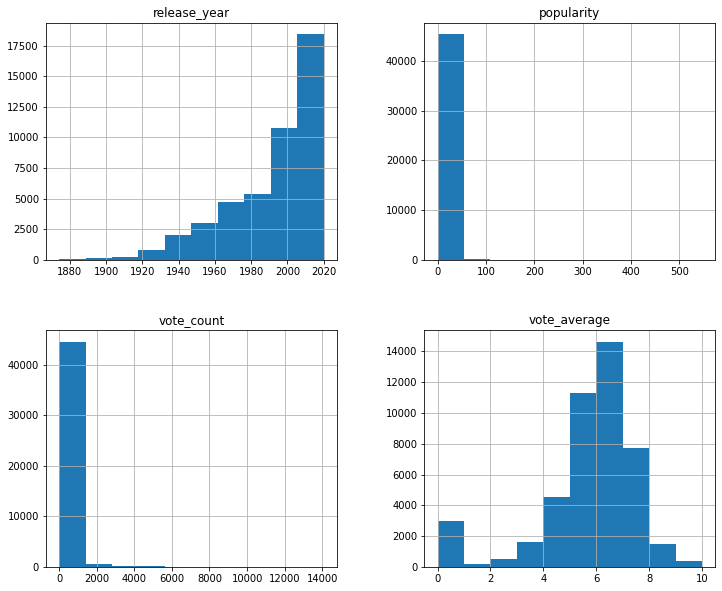

In [82]:
# Distribuciones de variables numéricas
columnas = ['release_year', 'popularity', 'vote_count', 'vote_average']
df_movies_credits_merge_by_id[columnas].hist(figsize=(12, 10))

- - -
Trabajando con generos de las peliculas

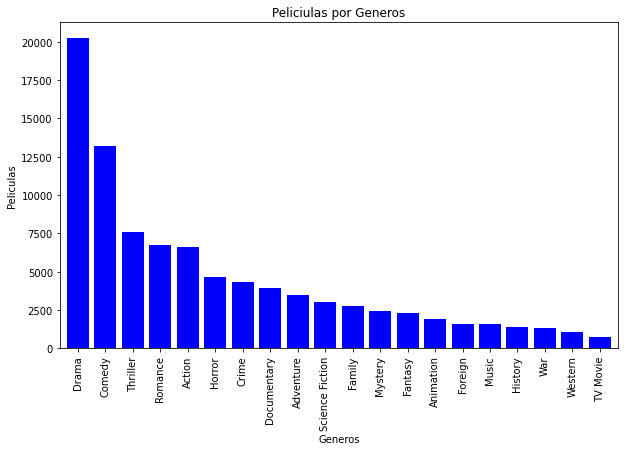

In [83]:
# Hacemos un dataset nuevo con solo las peliculas y los generos se parados en columnas numericas
peliculas_generos = df_movies_credits_merge_by_id[['title', 'genres', 'release_year']].copy()
peliculas_generos['genres'] = df_movies_credits_merge_by_id.genres.str.split(',')

for index, row in peliculas_generos.iterrows():                 # Se recorre toda la matriz
    for genre in row['genres']:                                 # se buscan los generos y
        peliculas_generos.at[index, genre] = 1                  # se le coloca 1 al genero encontrado
peliculas_generos = peliculas_generos.fillna(0)                 # En la columna que no tiene nada en el genero, se le coloca 0

peliculas_generos.drop(columns=['genres'], inplace=True)        # Le quitamos la olumna genres

# Columnas de generos para tenerlas filtradas
columnas = ['Adventure', 'Fantasy', 'Family', 'Romance', 'Comedy', 'Drama',
       'Action', 'Crime', 'Thriller', 'Animation', 'History',
       'Science Fiction', 'Mystery', 'War', 'Music', 'Horror', 'Documentary',
       'Foreign', 'Western', 'TV Movie']

suma_generos = peliculas_generos[columnas].sum().sort_values(ascending=False)

suma_generos.plot(kind='bar', x=suma_generos, y=columnas, figsize=(10, 6), color='blue', width=0.8)
plt.title('Peliciulas por Generos')
plt.xlabel('Generos')
plt.ylabel('Peliculas')
plt.show()

In [105]:
# columnas = peliculas_generos['release_year'].to_numpy().tolist()
peliculas_anno = peliculas_generos['release_year'].unique().tolist()
print(peliculas_anno)

[1874, 1878, 1883, 1887, 1888, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020]


In [14]:
# Columnas de generos para tenerlas filtradas
columnas = peliculas_generos['release_year'].to_numpy().tolist()

suma_generos = peliculas_generos[columnas].count().sort_values(ascending=False)

suma_generos.plot(kind='bar', x=suma_generos, y=columnas, figsize=(10, 6), color='blue', width=0.8)
plt.title('Peliciulas por Generos')
plt.xlabel('Años')
plt.ylabel('Peliculas')
plt.show()

KeyError: "None of [Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,\n            ...\n            1972, 1946, 2000, 2000, 1995, 1991, 2011, 2003, 1917, 2017],\n           dtype='int64', length=45369)] are in the [columns]"

- - -

# <h2 align=center> **API -  Application Programming Interface** </h1>

In [63]:
# Se importa el archivo 'LARG_moviesdataset_reducido_ml_sample_60.csv' con los datos de las peliculas,
# este archivo ya contiene la data limpia .
# Debido a que se dispone un servidor API gratis en render, este solo puede cargar 512 Mb de memoria, 
# se reduce el datasets para permitir que no ocupe toda la memoria gratis.
# Se trabaja con un dataframe, reducido el 60% de las filas de forma aleatoria
# Index: 10306
# Data columns (total 25 columns)

ruta_archivo_movies = "./Datasets/LARG_moviesdtaset_full.csv"
df_movies_des = pd.read_csv(ruta_archivo_movies)

In [76]:
# 1.- def peliculas_idioma( Idioma: str ): 
# Se ingresa un idioma (como están escritos en el dataset, no hay que traducirlos!). 
# Debe devolver la cantidad de películas producidas en ese idioma.
# Ejemplo: es -> Español, en -> Inglés, fr -> Frances

def peliculas_idioma(idioma:str):
    try:
        valores = df_movies_des[df_movies_des['original_language'] == idioma]
        cant_peliculas = int(valores['original_language'].count())
    except (ValueError, SyntaxError) as error_except:
        #pass
        print('No se encontro el idioma, error: ',error_except) 
    return {'Idioma indicado':idioma, 'Cantidad encontrada': cant_peliculas}

In [80]:
# Probando la funcion

cant_peliculas_producidas = peliculas_idioma('1')
print(cant_peliculas_producidas)

{'Idioma indicado': '1', 'Cantidad encontrada': 0}


In [137]:
# 2.- def peliculas_duracion( Pelicula: str ): 
# Se ingresa una pelicula. Debe devolver la duracion y el año.
# Ejemplo: Toy Story, Jumanji, Grumpier Old Men, Waiting to Exhale,	Father of the Bride Part II

def pelicula_duracion_anno(pelicula: str):
    try:
        duracion_min = df_movies_des[df_movies_des['title'] == pelicula]['runtime']
        anno = df_movies_des[df_movies_des['title'] == pelicula]['release_year']
    except (ValueError, SyntaxError):
        pass 
    return {'Nombre Pelicula':pelicula, 'Duracion en minutos':duracion_min, 'Año de estreno':anno}

In [138]:
# Probando la funcion

pelicula_dur_anno = pelicula_duracion_anno('Jumanji')
print(pelicula_dur_anno)

{'Nombre Pelicula': 'Jumanji', 'Duracion en minutos': 1    104.0
Name: runtime, dtype: float64, 'Año de estreno': 1    1995
Name: release_year, dtype: int64}


In [139]:
# 3.- def franquicia( Franquicia: str ): 
# Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio.
# Ejemplo: James Bond, Toy Story, Living Dead, A Nightmare on Elm Street, Beverly Hills Chihuahua

def franquicia_cant_gana_prom_peliculas(franquicia:str):
    try:
        cantidad_peliculas = int(df_movies_des[df_movies_des['belongs_to_collection'] == franquicia]['title'].count())
        ganancia_total = round(float(df_movies_des[df_movies_des['belongs_to_collection'] == franquicia]['revenue'].sum()),2)
        ganancia_promedio = 0
        if cantidad_peliculas != 0:
            ganancia_promedio = round(float(ganancia_total/cantidad_peliculas),2)
    except (ValueError, SyntaxError):
        pass 
    return {'Titulo franquicia':franquicia, 'Cantidad peliculas':cantidad_peliculas, 'Ganancia Total':ganancia_total, 'Promedio ganancia':ganancia_promedio}

In [140]:
# Probando la funcion

franquicia_cant_gana_prom_peli = franquicia_cant_gana_prom_peliculas('James Bond')
print(franquicia_cant_gana_prom_peli)

{'Titulo franquicia': 'James Bond', 'Cantidad peliculas': 26, 'Ganancia Total': 7106970239.0, 'Promedio ganancia': 273345009.19}


In [141]:
# 4.- def peliculas_pais(Pais: str): 
# Se ingresa un país (como están escritos en el dataset, no hay que traducirlos!),
# retornando la cantidad de peliculas producidas en el mismo.
# Ejemplo: United States of America, Canada, Spain, China,	Russia, Germany, Australia, United Kingdom

def peliculas_pais(pais:str):
    try:
        cant_peliculas = int(df_movies_des[df_movies_des['production_countries'] == pais]['title'].count())
    except (ValueError, SyntaxError):
        pass 
    return {'Pais':pais, 'Cantidad de peliculas que ha producido':cant_peliculas}

In [142]:
# Probando la funcion

pais_cant_peli = peliculas_pais('United Kingdom')
print(pais_cant_peli)

{'Pais': 'United Kingdom', 'Cantidad de peliculas que ha producido': 2235}


In [143]:
# 5.- def productoras_exitosas( Productora: str ): 
# Se ingresa la productora, entregandote el revunue total y la cantidad de peliculas que realizo.
# Ejemplo: Paramount Pictures,	Laurel Group, Gran Via Productions, Metro-Goldwyn-Mayer (MGM), Safir Films, Walt Disney Pictures,
# Republic Pictures, Warner Bros., Rysher Entertainment, Marvista Entertainment, Feifer Worldwide

def productoras_exitosas(productora:str):
    try:
        total_revenue = float(df_movies_des[df_movies_des['production_companies'] == productora]['revenue'].sum())
        cantidad_peliculas = int(df_movies_des[df_movies_des['production_companies'] == productora]['revenue'].count())
    except (ValueError, SyntaxError):
        pass 
    return {'Productora':productora, 'Total ingresos': total_revenue,'Cantidad de peliculas':cantidad_peliculas}

In [144]:
prod_ingresos_cant_peli = productoras_exitosas('Walt Disney Pictures')
print(prod_ingresos_cant_peli)

{'Productora': 'Walt Disney Pictures', 'Total ingresos': 3175301773.0, 'Cantidad de peliculas': 85}


- - -
Prueba 1 de la funcion 6

In [61]:
# 6.- def get_director( nombre_director ): 
# Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno.
# Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma, 
# en formato lista.
# Ejemplo: Forest Whitaker, John Lasseter, Howard Deutch,

# def peliculas_idioma( Idioma: str ): 
# Se ingresa un idioma (como están escritos en el dataset, no hay que traducirlos!). 
# Debe devolver la cantidad de películas producidas en ese idioma.
# df_split_job = df_movies_des['job'].str.split(',')
# df_split_crew = df_movies_des['crew'].str.split(',')

# def get_director(director:str):
#     try:
#         lista = []
#         for i, valor in enumerate(df_split_job):
#             for j in range(len(valor)):
#                 if valor[j] == 'Director':
#                     if (df_split_crew[i][j] == director):
#                         lista.append([df_split_crew[i][j], 
#                                     df_movies_des['title'][i],
#                                     df_movies_des['release_date'][i],
#                                     round(df_movies_des['return'][i], 2),
#                                     df_movies_des['budget'][i],
#                                     df_movies_des['revenue'][i]])
#     except (ValueError, SyntaxError):
#         pass 
#     return lista


- - -
Prueba 2 de la funcion 6

Esta es la funcion que se utiliza en la API.

In [145]:
# 6.- def get_director( nombre_director ): 
# Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno.
# Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma, 
# en formato lista.
# Ejemplo: Forest Whitaker, John Lasseter, Howard Deutch,

# def peliculas_idioma( Idioma: str ): 
# Se ingresa un idioma (como están escritos en el dataset, no hay que traducirlos!). 
# Debe devolver la cantidad de películas producidas en ese idioma.

# @app.get('/get_director/{nombre_director}')
def get_director(nombre_director:str):
    try:
        df_Director = df_movies_des[df_movies_des['crew'].str.contains(nombre_director)]
        Peliculas_del_Director = df_Director[['title', 'release_year', 'revenue', 'budget']]
        retorno_total_director = 0
        if(Peliculas_del_Director['budget'].sum() != 0):
            retorno_total_director = round((Peliculas_del_Director['revenue'].sum() / Peliculas_del_Director['budget'].sum()),2)
        # Lista_De_Dicc = Peliculas_del_Director.to_dict('records')     
        lista = Peliculas_del_Director.to_numpy().tolist()   
    except (ValueError, SyntaxError):
        pass 
    return {'director':nombre_director, 'retorno_total_director':retorno_total_director, 'Pelicula, Año, Ingreso, Presupuesto':lista}

In [146]:
# John Lasseter, Forest Whitaker

info_director_de_pelicula = get_director('John Lasseter')
print(info_director_de_pelicula)

{'director': 'John Lasseter', 'retorno_total_director': 4.04, 'Pelicula, Año, Ingreso, Presupuesto': [['Toy Story', 1995, 373554033.0, 30000000.0], ['Beauty and the Beast', 1991, 377350553.0, 25000000.0], ["A Bug's Life", 1998, 363258859.0, 120000000.0], ['Toy Story 2', 1999, 497366869.0, 90000000.0], ['Monsters, Inc.', 2001, 562816256.0, 115000000.0], ['Finding Nemo', 2003, 940335536.0, 94000000.0], ['The Incredibles', 2004, 631442092.0, 92000000.0], ["Howl's Moving Castle", 2004, 234710455.0, 24000000.0], ['Luxo Jr.', 1986, 0.0, 0.0], ['Cars', 2006, 461983149.0, 120000000.0], ['Ratatouille', 2007, 623722818.0, 150000000.0], ['WALL·E', 2008, 521311860.0, 180000000.0], ['Bolt', 2008, 309979994.0, 150000000.0], ['Up', 2009, 735099082.0, 175000000.0], ['Partly Cloudy', 2009, 0.0, 0.0], ['The Princess and the Frog', 2009, 267045765.0, 105000000.0], ['Toy Story 3', 2010, 1066969703.0, 200000000.0], ['Tangled', 2010, 591794936.0, 260000000.0], ['Cars 2', 2011, 559852396.0, 200000000.0], ['J

- - -

# <h2 align=center> **ML -  Machine Learning** </h1>

**`Modelos de evaluacion`**

wordcloud - Nubes de palabras

Las nubes de palabras o nubes de etiquetas son representaciones gráficas de la frecuencia de las palabras que otorgan mayor protagonismo a las palabras que aparecen con mayor frecuencia en un texto de origen.



In [17]:
# Librerias utilizadas
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Se importa el archivo 'LARG_moviesdtaset_full.csv' con los datos de las peliculas
ruta_archivo_movies = "./Datasets/LARG_moviesdtaset_full.csv"
LARG_moviesdataset_reducido = pd.read_csv(ruta_archivo_movies)
LARG_moviesdataset_reducido.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
print(df_movies_credits_merge_by_id.shape)
print(df_movies_credits_merge_by_id.info())

(45369, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45369 entries, 0 to 45368
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             45369 non-null  int64  
 1   id                     45369 non-null  int64  
 2   title                  45369 non-null  object 
 3   genres                 45369 non-null  object 
 4   overview               45369 non-null  object 
 5   budget                 45369 non-null  float64
 6   spoken_languages       45369 non-null  object 
 7   original_language      45369 non-null  object 
 8   belongs_to_collection  45369 non-null  object 
 9   production_companies   45369 non-null  object 
 10  production_countries   45369 non-null  object 
 11  status                 45369 non-null  object 
 12  release_date           45369 non-null  object 
 13  release_year           45369 non-null  int64  
 14  runtime                45369 non-null  flo

In [23]:
print('Cantidad de nulos: ', df_movies_credits_merge_by_id.isnull().sum())

Cantidad de nulos:  Unnamed: 0               0
id                       0
title                    0
genres                   0
overview                 0
budget                   0
spoken_languages         0
original_language        0
belongs_to_collection    0
production_companies     0
production_countries     0
status                   0
release_date             0
release_year             0
runtime                  0
popularity               0
vote_count               0
vote_average             0
revenue                  0
return                   0
tagline                  0
character                0
cast                     0
department               0
job                      0
crew                     0
dtype: int64


In [46]:
pelicula = 'waiting to exhale'
pelicula = pelicula.title()
pelicula_rec = LARG_moviesdataset_reducido.loc[LARG_moviesdataset_reducido['title'].str.title() == pelicula, 'title'].iloc[0]
# cadena_pelicula_caracteristicas = LARG_moviesdataset_reducido.loc[LARG_moviesdataset_reducido['title'].str.lower() == pelicula.lower(), 'genres'].iloc[0] + ' ' + LARG_moviesdataset_reducido.loc[LARG_moviesdataset_reducido['title'] == pelicula, 'crew'].iloc[0] + ' ' + LARG_moviesdataset_reducido.loc[LARG_moviesdataset_reducido['title'] == pelicula, 'cast'].iloc[0] + ' ' + LARG_moviesdataset_reducido.loc[LARG_moviesdataset_reducido['title'] == pelicula, 'release_year'].iloc[0].astype(str)
print(pelicula_rec)

Waiting to Exhale


In [47]:
def recomendar_pelicula(pelicula:str):

    # Se pone la pelicula como titulo, es decir, la primera letra de cada palabra en mayuscula, para evitar que falle si no lo escribe bien.
    pelicula = pelicula.title()
    
    # pelicula = lowercase(pelicula)      # Se convierte la pelicula buscada en minuscula
    # Crear un objeto CountVectorizer para convertir las características en vectores
    vectorizer = CountVectorizer(analyzer='word', lowercase=True, token_pattern=r'\w+')

    # Concatena todas las caracteristicas que deseo evaluar
    cadena_todas_caracteristicas = LARG_moviesdataset_reducido['genres'].fillna('') + ' ' + LARG_moviesdataset_reducido['crew'].astype(str) + ' ' + LARG_moviesdataset_reducido['cast'].astype(str) + ' ' + LARG_moviesdataset_reducido['release_year'].astype(str)
    # Obtener la matriz de documentos término-frecuencia (DTM) a partir de las características
    matrix_todas_caracteristicas = vectorizer.fit_transform(cadena_todas_caracteristicas)

    # Obtener las características de la película que le gustó al usuario
    cadena_pelicula_caracteristicas = LARG_moviesdataset_reducido.loc[LARG_moviesdataset_reducido['title'].str.title() == pelicula, 'genres'].iloc[0] + ' ' + LARG_moviesdataset_reducido.loc[LARG_moviesdataset_reducido['title'].str.title() == pelicula, 'crew'].iloc[0] + ' ' + LARG_moviesdataset_reducido.loc[LARG_moviesdataset_reducido['title'].str.title() == pelicula, 'cast'].iloc[0] + ' ' + LARG_moviesdataset_reducido.loc[LARG_moviesdataset_reducido['title'].str.title() == pelicula, 'release_year'].iloc[0].astype(str)
    # Obtener la matriz de documentos término-frecuencia (DTM) a partir de las características
    matrix_pelicula_caracteristica = vectorizer.transform([cadena_pelicula_caracteristicas])

    # Calcular la similitud del coseno entre la película que le gustó al usuario y todas las demás películas
    similitudes = cosine_similarity(matrix_pelicula_caracteristica, matrix_todas_caracteristicas)

    # Obtener los índices de las películas más similares
    similitudes_indices = similitudes.argsort()[0][-6:-1]

    # Obtener los títulos de las películas más similares
    similitudes_peliculas = LARG_moviesdataset_reducido.loc[similitudes_indices, 'title'].tolist()

    return similitudes_peliculas

In [53]:
# Comprobando la funcion

pelicula = 'monsters, inc.'
recomendaciones = recomendar_pelicula(pelicula)

print(f"Si vistes: {pelicula}")
print(f"Te recomiendo: {recomendaciones}")

Si vistes: monsters, inc.
Te recomiendo: ['15 Minutes', 'Up', 'The Incredibles', 'Finding Nemo', 'Toy Story 2']


- - -